In [1]:
import numpy as np
import pandas as pd 


In [ ]:
# import requests
# import zipfile
# import io

# # URL of the API endpoint that provides the zip file
# api_url = "https://api.data.gov.my/gtfs-static/prasarana?category=rapid-rail-kl"

# try:
#     # Make a GET request to the API
#     response = requests.get(api_url)

#     # Check if the request was successful (status code 200)
#     if response.status_code == 200:
#         # Open the zip file from the response content
#         with zipfile.ZipFile(io.BytesIO(response.content), 'r') as zip_ref:
#             # Extract all contents to a directory
#             zip_ref.extractall("extracted_data_directory")
#         print("Data extracted successfully.")
#     else:
#         print("Failed to retrieve data. Status code:", response.status_code)
# except Exception as e:
#     print("An error occurred:", e)


In [2]:
# Load an empty map
from keplergl import KeplerGl
map_1 = KeplerGl(height=500)
map_1

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(height=500)

In [ ]:
# import pandas as pd
# from keplergl import KeplerGl

# # Load GTFS data into Pandas DataFrames
# # Assuming you have already downloaded and extracted GTFS files
# # Adjust the file paths as necessary
# agency_df = pd.read_csv("data/agency.txt")
# stops_df = pd.read_csv("data/stops.txt")
# routes_df = pd.read_csv("data/routes.txt")
# trips_df = pd.read_csv("data/trips.txt")
# stop_times_df = pd.read_csv("data/stop_times.txt")


# # Preprocess the data if needed (e.g., merge relevant tables, convert data types, etc.)

# # Create a Kepler.gl map
# map_1 = KeplerGl()

# # Add data to the map
# map_1.add_data(data=agency_df, name='agency')
# map_1.add_data(data=stops_df, name='stops')
# map_1.add_data(data=routes_df, name='routes')
# map_1.add_data(data=trips_df, name='trips')
# map_1.add_data(data=stop_times_df, name='stop_times')

# # Visualize the data within Kepler.gl
# map_1

# # You can further configure the map interactively in the Jupyter Notebook environment

# # If you want to save the map configuration for later use or share it with others
# # you can save it as a JSON file
# # config = map_1.config
# # with open('keplergl_config.json', 'w') as f:
# #     f.write(config)

# # You can also export the map as an HTML file
# map_1.save_to_html(file_name='keplergl_map.html')


In [3]:
import pandas as pd
from keplergl import KeplerGl
from datetime import datetime
import json

# Load GTFS data into Pandas DataFrames
# Assuming you have already downloaded and extracted GTFS files
# Adjust the file paths as necessary
agency_df = pd.read_csv("data/agency.txt")
stops_df = pd.read_csv("data/stops.txt")
routes_df = pd.read_csv("data/routes.txt")
trips_df = pd.read_csv("data/trips.txt")
stop_times_df = pd.read_csv("data/stop_times.txt")
shape_df = pd.read_csv("data/shapes.txt")


# Preprocess the data if needed (e.g., convert time strings to datetime objects)
# stop_times_df['arrival_time'] = pd.to_datetime(stop_times_df['arrival_time'], format='%H:%M:%S').dt.time
time_format = "%H:%M:%S"
stop_times_df["arrival_time"] = stop_times_df["arrival_time"].apply(lambda x: datetime.strptime(x, time_format))


# Assuming the 'arrival_time' column represents the time dimension
# You can also use 'departure_time' or any other time-related column from your GTFS data

# Create a Kepler.gl map
map_1 = KeplerGl()

# Add data to the map
map_1.add_data(data=agency_df, name='agency')
map_1.add_data(data=stops_df, name='stops')
map_1.add_data(data=routes_df, name='routes')
map_1.add_data(data=trips_df, name='trips')
map_1.add_data(data=stop_times_df, name='stop_times')
map_1.add_data(data=shape_df, name='shapes')


# Configure the Kepler.gl map to animate based on the timestamp column
map_1.config = {
    'version': 'v1',
    'config': {
        'animationConfig': {
            'currentTime': datetime.utcnow().timestamp(),  # Set current time
            'speed': 1  # Set animation speed
        }
    }
}

# Visualize the animated data within Kepler.gl

map_1
# You can further configure the map interactively in the Jupyter Notebook environment

# If you want to save the map configuration for later use or share it with others
# you can save it as a JSON file
config = map_1.config

# config["config"]["animationConfig"]["currentTime"] = str(config["config"]["animationConfig"]["currentTime"])

configsave = json.dumps(config, default=str)
print(configsave)
with open('keplergl_config.json', 'w') as f:
    f.write(configsave)

# You can also export the map as an HTML file
# map_1.save_to_html(file_name='keplergl_animated_map.html')
map_1

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter
{"version": "v1", "config": {"animationConfig": {"currentTime": 1707936047.386651, "speed": 1}}}


c:\Users\nasuha.imanina\Documents\govdata\venv\lib\site-packages\jupyter_client\session.py:721: UserWarning: Message serialization failed with:
Out of range float values are not JSON compliant
Supporting this message is deprecated in jupyter-client 7, please make sure your message is JSON-compliant
  content = self.pack(content)
c:\Users\nasuha.imanina\Documents\govdata\venv\lib\site-packages\jupyter_client\session.py:721: UserWarning: Message serialization failed with:
Out of range float values are not JSON compliant
Supporting this message is deprecated in jupyter-client 7, please make sure your message is JSON-compliant
  content = self.pack(content)
c:\Users\nasuha.imanina\Documents\govdata\venv\lib\site-packages\jupyter_client\session.py:721: UserWarning: Message serialization failed with:
Out of range float values are not JSON compliant
Supporting this message is deprecated in jupyter-client 7, please make sure your message is JSON-compliant
  content = self.pack(content)
c:\User

KeplerGl(config={'version': 'v1', 'config': {'animationConfig': {'currentTime': 1707936047.386651, 'speed': 1}…

In [7]:
import pandas as pd

URL_DATA = 'https://storage.data.gov.my/transportation/ridership_headline.parquet'

df = pd.read_parquet(URL_DATA)
if 'date' in df.columns: df['date'] = pd.to_datetime(df['date'])
df.fillna(0,inplace= True)
df.to_csv('publicdata.csv')
print(df)

           date  bus_rkl  bus_rkn  bus_rpn  rail_lrt_ampang  rail_mrt_kajang  \
0    2019-01-01        0        0        0           113357           114173   
1    2019-01-02        0        0        0           182715           169316   
2    2019-01-03        0        0        0           187904           175304   
3    2019-01-04        0        0        0           198420           187891   
4    2019-01-05        0        0        0           120773           112660   
...         ...      ...      ...      ...              ...              ...   
1852 2024-01-27   151488     2230    40089           114892           170826   
1853 2024-01-28   141146     2070    41601            96029           147205   
1854 2024-01-29   219255     2449    44221           164224           232469   
1855 2024-01-30   218058     2279    44764           168871           244641   
1856 2024-01-31   226222     2292    45348           171748           255045   

      rail_lrt_kj  rail_monorail  rail_

In [8]:
df.columns

Index(['date', 'bus_rkl', 'bus_rkn', 'bus_rpn', 'rail_lrt_ampang',
       'rail_mrt_kajang', 'rail_lrt_kj', 'rail_monorail', 'rail_mrt_pjy',
       'rail_ets', 'rail_intercity', 'rail_komuter_utara', 'rail_tebrau',
       'rail_komuter'],
      dtype='object')

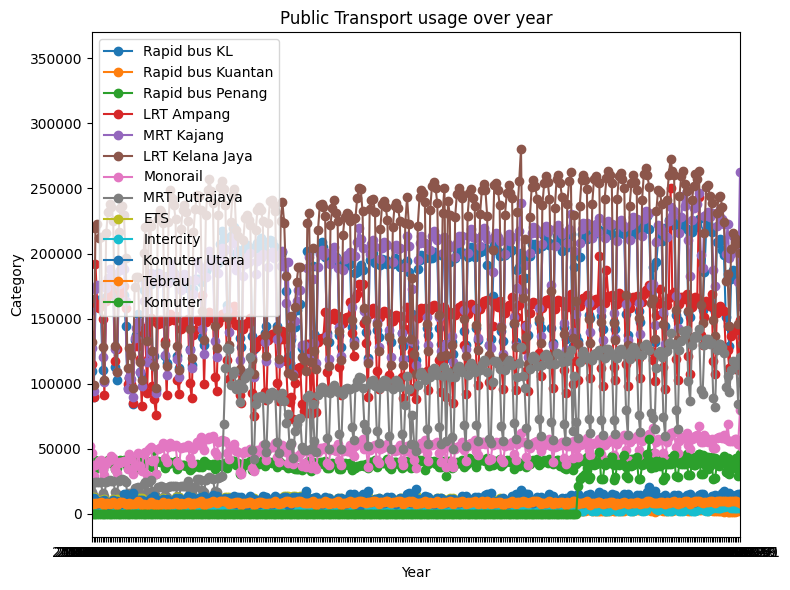

In [10]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.figure(figsize=(8, 6))  # Width, height in inches



# Plot the graph for multiple lines
plt.plot(df['date'], df['bus_rkl'], marker='o', label='Rapid bus KL')
plt.plot(df['date'], df['bus_rkn'], marker='o', label='Rapid bus Kuantan')
plt.plot(df['date'], df['bus_rpn'], marker='o', label='Rapid bus Penang')
plt.plot(df['date'], df['rail_lrt_ampang'], marker='o', label='LRT Ampang')
plt.plot(df['date'], df['rail_mrt_kajang'], marker='o', label='MRT Kajang')
plt.plot(df['date'], df['rail_lrt_kj'], marker='o', label='LRT Kelana Jaya')
plt.plot(df['date'], df['rail_monorail'], marker='o', label='Monorail')
plt.plot(df['date'], df['rail_mrt_pjy'], marker='o', label='MRT Putrajaya')
plt.plot(df['date'], df['rail_ets'], marker='o', label='ETS')
plt.plot(df['date'], df['rail_intercity'], marker='o', label='Intercity')
plt.plot(df['date'], df['rail_komuter_utara'], marker='o', label='Komuter Utara')
plt.plot(df['date'], df['rail_tebrau'], marker='o', label='Tebrau')
plt.plot(df['date'], df['rail_komuter'], marker='o', label='Komuter')



# Add labels and title
plt.xlabel('Year')
plt.ylabel('Category')
plt.title('Public Transport usage over year')

# Set the range for the x-axis (date range)
plt.xlim(datetime.strptime('2023-01-01', "%Y-%m-%d"), datetime.strptime('2023-12-31', "%Y-%m-%d"))

# Format the x-axis dates
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())

# Show the plot
plt.tight_layout()

# Add legend
plt.legend()

# Show the plot
plt.show()